In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap


def create_varius_radius_pie_chart(df, crop_col='Crop', value_col='Number of the tissue'):
    """
    Create a pie chart where all slices have equal angles but different radii
    based on the quantitative values.
    """
    
    # Get data
    labels = df[crop_col].values
    values = df[value_col].values
    n_slices = len(labels)
    
    # Equal angles for all slices
    angles = np.linspace(0, 2*np.pi, n_slices, endpoint=False)
    
    # Normalize values to create different radii (between 0.3 and 1.0)
    min_radius = 0.3
    max_radius = 1.0
    normalized_values = (values - values.min()) / (values.max() - values.min())
    radii = min_radius + normalized_values * (max_radius - min_radius)
    
    # Create gradient colormap
    colors = plt.cm.viridis(np.linspace(0, 1, n_slices))
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))
    
    # Width of each slice (equal angles)
    width = 2 * np.pi / n_slices
    
    # Create bars (slices)
    bars = ax.bar(angles, radii, width=width, bottom=0.0, alpha=0.8)
    
    # Apply colors
    for bar, color in zip(bars, colors):
        bar.set_color(color)
        bar.set_edgecolor('white')
        bar.set_linewidth(1)
    
    # Customize the plot
    ax.set_theta_zero_location('N')  # Start from top
    ax.set_theta_direction(-1)  # Clockwise
    ax.set_ylim(0, max_radius * 1.1)
    
    # Remove radial labels and grid
    ax.set_rticks([])
    ax.set_rgrids([])
    ax.grid(True, alpha=0.3)
    
    # Add labels
    for angle, radius, label, value in zip(angles, radii, labels, values):
        # Position labels outside the slices
        label_radius = radius + 0.15
        x = angle
        y = label_radius
        
        # Adjust text alignment based on angle
        ha = 'center'
        if angle > np.pi/2 and angle < 3*np.pi/2:
            rotation = np.degrees(angle) - 180
        else:
            rotation = np.degrees(angle)
            
        ax.text(x, y, f'{label}\n({value})', 
                rotation=rotation, ha=ha, va='center',
                fontsize=9, fontweight='bold')
    
    # Add title
    plt.title('Varius-Radius Pie Chart\n(Equal Angles, Radius Based on Values)', 
              pad=20, fontsize=14, fontweight='bold')
    
    # Add colorbar legend
    sm = plt.cm.ScalarMappable(cmap='viridis', 
                              norm=plt.Normalize(vmin=values.min(), vmax=values.max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, pad=0.1, shrink=0.8)
    cbar.set_label('Number of Tissue', rotation=270, labelpad=20)
    
    plt.tight_layout()
    return fig, ax

# Create the chart
fig, ax = create_varius_radius_pie_chart(df_sorted)
plt.show()

# Print the sorted data
print("Data sorted by Number of Tissue (descending):")
print(df_sorted.to_string(index=False))

# Additional function to create chart from CSV file
def create_chart_from_csv(csv_file_path):
    """
    Create the chart directly from a CSV file
    """
    df = pd.read_excel(csv_file_path)
    # Assuming columns are named 'Crop' and 'Number_of_tissue'
    # Adjust column names if needed
    df_sorted = df.sort_values('Number of the tissue', ascending=False).reset_index(drop=True)
    return create_varius_radius_pie_chart(df_sorted)

# Example usage with CSV:
# fig, ax = create_chart_from_csv('your_data.csv')
# plt.show()

KeyError: 'Number of the tissue'

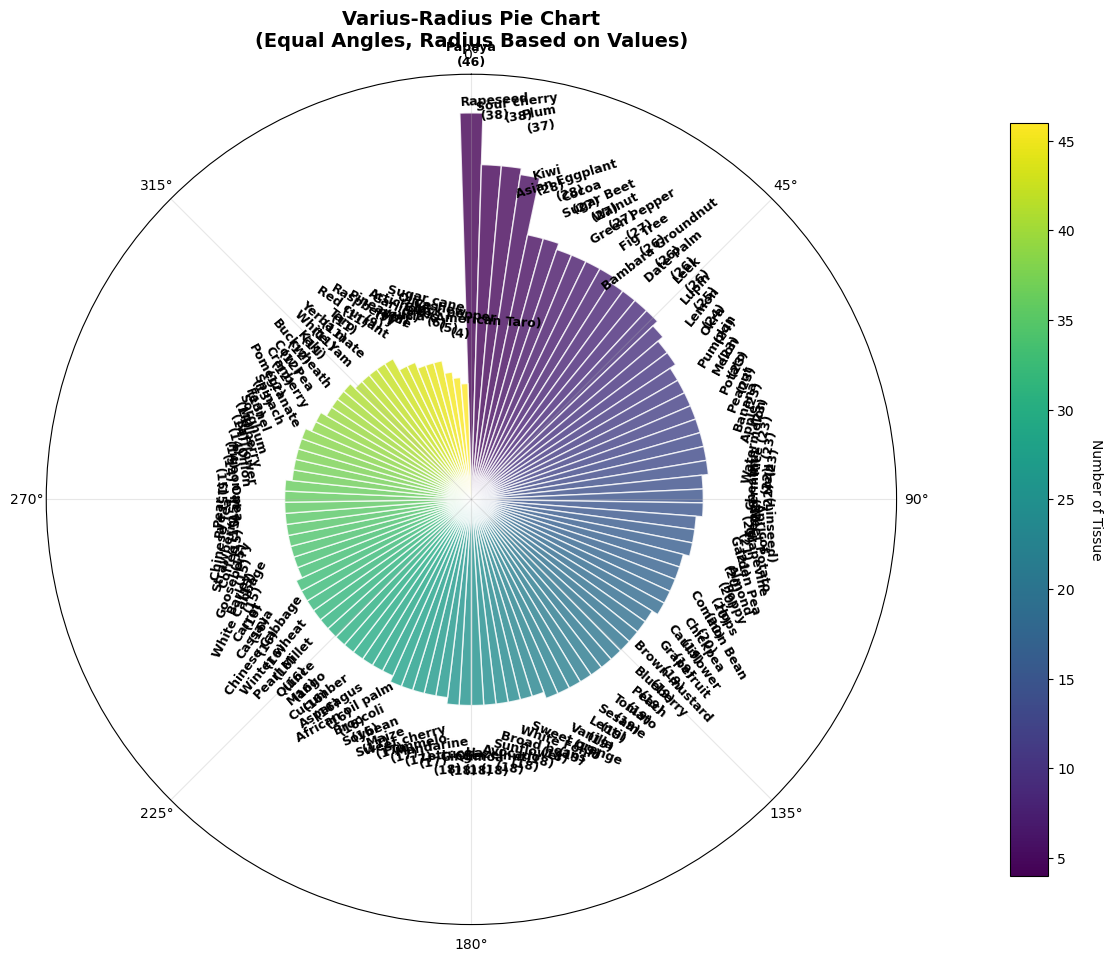

In [11]:
fig, ax = create_chart_from_csv('StatusUpdate.xlsx')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = 
# Sort by Number_of_tissue in descending order
df_sorted = df.sort_values('Number_of_tissue', ascending=False).reset_index(drop=True)

# Get data
labels = df_sorted['Crop'].values
values = df_sorted['Number_of_tissue'].values
n_slices = len(labels)

# Equal angles for all slices
angles = np.linspace(0, 2*np.pi, n_slices, endpoint=False)

# Normalize values to create different radii (between 0.3 and 1.0)
min_radius = 0.3
max_radius = 1.0
normalized_values = (values - values.min()) / (values.max() - values.min())
radii = min_radius + normalized_values * (max_radius - min_radius)

# Create gradient colormap
colors = plt.cm.viridis(np.linspace(0, 1, n_slices))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))

# Width of each slice (equal angles)
width = 2 * np.pi / n_slices

# Create bars (slices)
bars = ax.bar(angles, radii, width=width, bottom=0.0, alpha=0.8)

# Apply colors
for bar, color in zip(bars, colors):
    bar.set_color(color)
    bar.set_edgecolor('white')
    bar.set_linewidth(1)

# Customize the plot
ax.set_theta_zero_location('N')  # Start from top
ax.set_theta_direction(-1)  # Clockwise
ax.set_ylim(0, max_radius * 1.1)

# Remove radial labels and grid
ax.set_rticks([])
ax.set_rgrids([])
ax.grid(True, alpha=0.3)

# Add labels
for angle, radius, label, value in zip(angles, radii, labels, values):
    # Position labels outside the slices
    label_radius = radius + 0.15
    x = angle
    y = label_radius
    
    # Adjust text alignment based on angle
    ha = 'center'
    if angle > np.pi/2 and angle < 3*np.pi/2:
        rotation = np.degrees(angle) - 180
    else:
        rotation = np.degrees(angle)
        
    ax.text(x, y, f'{label}\n({value})', 
            rotation=rotation, ha=ha, va='center',
            fontsize=9, fontweight='bold')

# Add title
plt.title('Varius-Radius Pie Chart\n(Equal Angles, Radius Based on Values)', 
          pad=20, fontsize=14, fontweight='bold')

# Add colorbar legend
sm = plt.cm.ScalarMappable(cmap='viridis', 
                          norm=plt.Normalize(vmin=values.min(), vmax=values.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label('Number of Tissue', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

# Print the sorted data
print("Data sorted by Number of Tissue (descending):")
print(df_sorted.to_string(index=False))